In [175]:
import pandas as pd                 
import numpy as np
import matplotlib.pyplot as plt    
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [176]:
# use Pandas to read in csv files. The pd.read_csv() method creates a DataFrame from a csv file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [177]:
train.shape

(1460, 81)

In [178]:
test.shape

(1459, 80)

In [179]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [180]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [181]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [182]:
train.SalePrice.skew()

1.8828757597682129

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

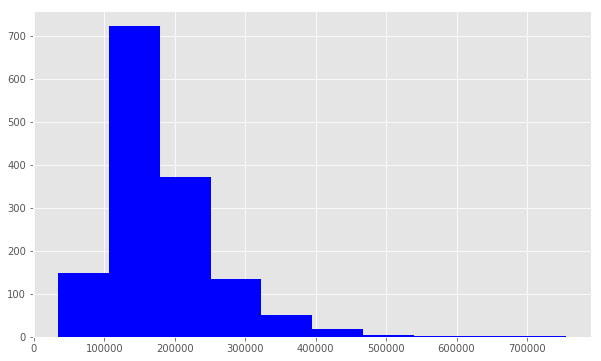

In [183]:
plt.hist(train.SalePrice, color='blue')

In [184]:
target = np.log(train.SalePrice)

In [185]:
target.skew()

0.12133506220520406

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

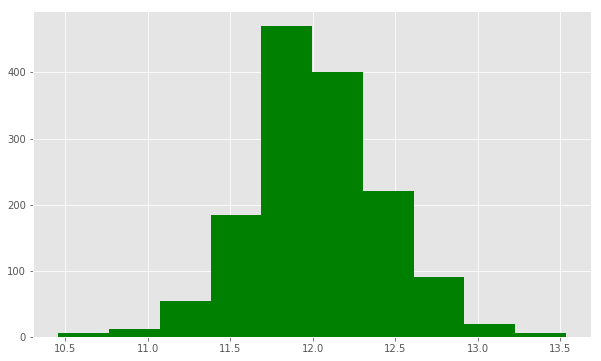

In [186]:
plt.hist(target, color='green')

In [187]:
numeric_features = train.select_dtypes(include=[np.number])

In [188]:
#numeric_features.dtypes

In [189]:
corr = numeric_features.corr()

In [190]:
corr['SalePrice'].sort_values(ascending=False)[:5]

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

In [191]:
corr['SalePrice'].sort_values(ascending=False)[-5:]

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [192]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [193]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

In [194]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


In [195]:
train = train[train['GarageArea'] < 1200]

In [196]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'

In [197]:
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [198]:
train.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [199]:
categoricals = train.select_dtypes(exclude=[np.number])

In [200]:
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [201]:
train.Street.value_counts()

Pave    1450
Grvl       5
Name: Street, dtype: int64

In [202]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

In [203]:
train.enc_street.value_counts()

1    1450
0       5
Name: enc_street, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

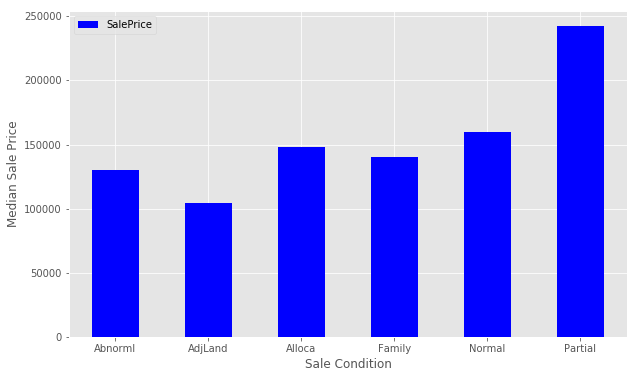

In [204]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

In [205]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

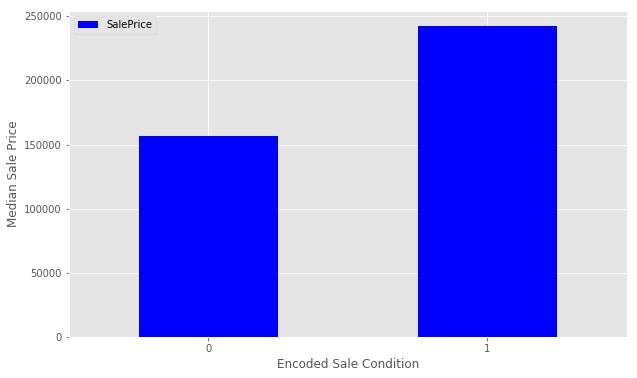

In [206]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

In [207]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [208]:
sum(data.isnull().sum() != 0)

0

In [209]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [211]:
lr = linear_model.LinearRegression()

In [212]:
model = lr.fit(X_train, y_train)

In [213]:
model.score(X_test, y_test)

0.8882477709262553

In [214]:
predictions = model.predict(X_test)

In [215]:
mean_squared_error(y_test, predictions)

0.01784179451956757

In [216]:
actual_values = y_test

Text(0.5,1,'Linear Regression Model')

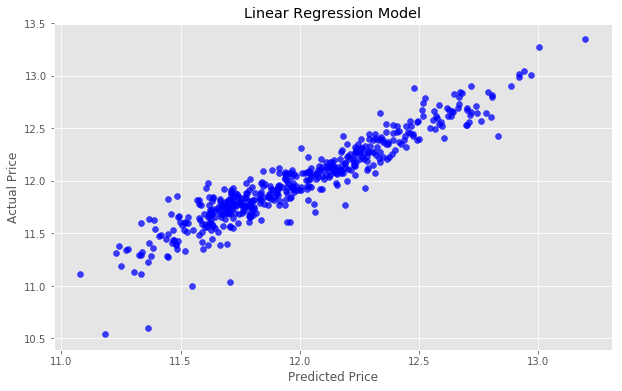

In [217]:
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

In [218]:
 model.score(X_test, y_test)

0.8882477709262553

In [219]:
submission = pd.DataFrame()

In [220]:
submission['Id'] = test.Id

In [221]:
feats = test.select_dtypes(
    include=[np.number]).drop(['Id'], axis=1).interpolate()

In [222]:
predictions = model.predict(feats)

In [223]:
final_predictions = np.exp(predictions)

In [224]:
predictions[:10]

array([11.76725362, 11.71929504, 12.07656074, 12.20632678, 12.11217655,
       12.05709882, 12.16036698, 12.01665734, 12.17126892, 11.66318882])

In [225]:
final_predictions[:10]

array([128959.49172586, 122920.7402436 , 175704.82598102, 200050.83263756,
       182075.46986405, 172318.33397533, 191064.62164201, 165488.55901671,
       193158.99133192, 116214.02546462])

In [226]:
submission['SalePrice'] = final_predictions

In [227]:
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [228]:
submission.to_csv('submission_Raj_Shahu.csv', index=False)